In [4]:
import pickle

map_file = "doorkey_all_maps.pickle"

target_index = 2

with open(map_file, 'rb') as handle:
    new_target_maps = pickle.load(handle)

new_target_maps[target_index]

array([[0, 5, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2],
       [1, 1, 1, 3, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 4, 1, 0],
       [0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0]])

In [1]:
import glob
import json
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from natsort import natsorted
import matplotlib.pyplot as plt
from collections import defaultdict
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


def load_csv(file_name):
    with open(file_name, "rt") as file_handler:
        data_frame = pd.read_csv(file_handler, index_col=None)

    data_frame = data_frame.rename(columns={'Unnamed: 0': 'index', 'Index, Eval': 'reward'})
    return data_frame


def tabulate_events(dpath, type="eval/mean_reward"):
    summary_iterators = [EventAccumulator(os.path.join(dpath, dname)).Reload() for dname in os.listdir(dpath)]

    tags = summary_iterators[0].Tags()['scalars']


    for it in summary_iterators:
        assert it.Tags()['scalars'] == tags

    out = defaultdict(list)
    steps = []

    for tag in tags:
        if tag == type:
            steps = [e.step for e in summary_iterators[0].Scalars(tag)]

            for events in zip(*[acc.Scalars(tag) for acc in summary_iterators]):
                assert len(set(e.step for e in events)) == 1

                out[tag].append([e.value for e in events])

    return out, steps


def to_csv(dpath = "2Ocak_PPOCNN_Bayes_8x8/tensorboard/target1/"):
    dirs = os.listdir(dpath)

    for dir in dirs:
        d, steps = tabulate_events(dpath + dir)
        tags, values = zip(*d.items())
        np_values = np.array(values)
        # stop

        for index, tag in enumerate(tags):
            df = pd.DataFrame(np_values[index], index=steps, columns=["Index, Eval"])
            df.to_csv(dpath + dir + ".csv")

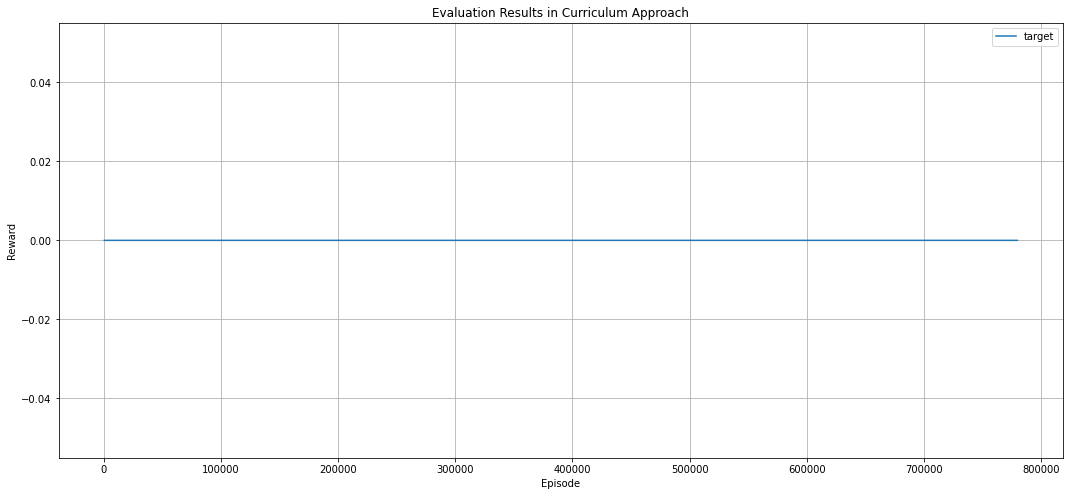

In [15]:
# folder = "2Ocak_PPOCNN_NoCurriculum"
# index = 1

# to_csv(dpath = folder + "/tensorboard/target" + str(index) + "/")

# fig = plt.figure(figsize=(18, 8))
# dir_list = glob.glob(folder + "/tensorboard/target" + str(index) + "/*.csv")
# dir_list = natsorted(dir_list)
# prev_ind = 0
# name_list = []
# for dir in dir_list:
#     name = dir.split("\\")[-1].split("target_" + str(index) + "_")[-1][:-4]
#     name_list.append(name)
#     pd_frame = load_csv(dir)
#     pd_frame['index'] += prev_ind
#     prev_ind = np.max(pd_frame['index'].values)
#     sns.lineplot(x='index', y='reward', data=pd_frame)


# plt.legend(labels=name_list)
# plt.title('Evaluation Results in Curriculum Approach')
# plt.xlabel('Episode')
# plt.ylabel('Reward')
# plt.grid()
# plt.savefig("NoCurriculum_target_" + str(index) +".png")

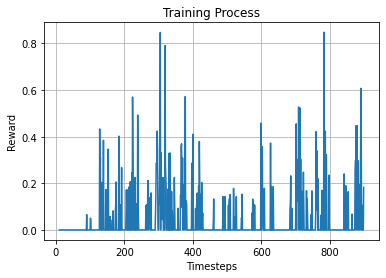

In [18]:
file_name = "logs/cbet-20230119-190115/logs.csv"

with open(file_name, "rt") as file_handler:
        data_frame = pd.read_csv(file_handler)

# data_frame["mean_episode_return"]

# data_frame["# _tick"] = data_frame["# _tick"]
sns.lineplot(x='# _tick', y='mean_episode_return', data=data_frame[:900])
# plt.legend(labels=name_list)
plt.title('Training Process')
plt.xlabel('Timesteps')
plt.ylabel('Reward')
plt.grid()
plt.savefig("Cbet.png")

In [19]:
(data_frame["_time"].values[-1] - data_frame["_time"].values[0]) / (1000 * 1)

22.952415726184846

In [20]:
data_frame["_time"].values[0]

1674144122.225756

In [21]:
data_frame["_time"].values[1]

1674144133.902032